# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tfIdfInheritVectorizer

  Preparing metadata (setup.py) ... done
  Created wheel for tfIdfInheritVectorizer: filename=tfIdfInheritVectorizer-0.1-py3-none-any.whl size=5445 sha256=eaf49b0e892a00fb2ea8afaf13f9f6d03eb8f16125ba6c35d3b43cae348d4d54
  Stored in directory: /root/.cache/pip/wheels/08/c6/7c/ebca9cd502a98191beb4c5fcc6b8596c246e6a62dffd635f16
Successfully built tfIdfInheritVectorizer


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Dataset

In [ ]:
#Load Lbeled Dataset
df = pd.read_excel('/content/drive/MyDrive/THESIS/Dataset/Labeled_Dataset1.xlsx')

In [ ]:
df.tail(20)

,Comments,Label
10496,jusme mga question halatang dilawan,anger
10497,tatawa lang ako kapag paninira kay leni kinoko...,anger
10498,nangongopya lang ng sagot si perdi makoy. yan ...,anger
10499,marcos - production at building nation\n -----...,anger
10500,si bbm parang nangongopya lang ng sagot haha,anger
10501,leni lugaw\n leni lugaw\n leni lugaw\n leni lugaw,anger
10502,leni niyong hindi daw pangarap tumakbong presi...,anger
10503,"hahah bbm talaga natin palabiro.,green card sa...",anger
10504,ang bilis ng sagot ni leni na no as president ...,joy
10505,oh nakita niyo ha walang plano si leni tumakbo...,anger


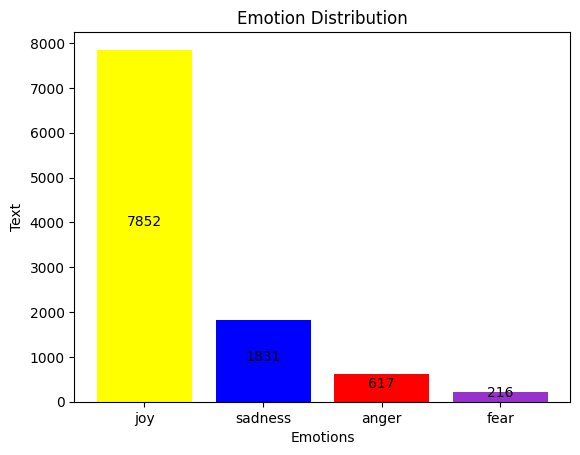

In [ ]:
# Count the number of comments for each emotion label
emotion_counts = df['Label'].value_counts()

# Define a list of colors
color_list = ['yellow', 'blue', 'red', 'darkorchid']

# Create a bar graph
plt.bar(emotion_counts.index, emotion_counts.values, color=color_list)
plt.xlabel('Emotions')
plt.ylabel('Text')
plt.title('Emotion Distribution')

# Add value labels on each bar
for i, v in enumerate(emotion_counts.values):
    plt.text(i, v/2, str(v), ha='center')

plt.show()

# Data Pre-processing

In [ ]:
#TOKENIZATION
#LOWERCASING
#EXPAND ABBREVIATIONS, ACRONYMS, SLANG

# Define the dictionary of common abbreviations, acronyms, and english slangs.
word_list = {
         "afaik": "as far as i know","ama": "ask me anything","api": "application programming interface","asl": "age, sex, location","asmr": "autonomous sensory meridian response","atm": "at the moment",
         "atp": "at this point","b2b": "business-to-business","b2c": "business-to-consumer","brb": "be right back","bae": "before anyone else","bff": "best friends forever","bsaaw": "but seriously as a wolf",
         "btaim": "by the way as i mentioned","bts": "behind the scenes","btw": "by the way","cc": "carbon copy","cms": "content management system","cmv": "change my view","cpc": "cost-per-click","cpm": "cost-per-mille",
         "cr": "conversion rate","crm": "customer relationship management","cro": "conversion rate optimization","css": "cascading style sheets","cta": "call-to-action","ctr": "click-through rate","cx": "customer experience",
         "d2e": "does anyone else","dae": "does anyone else","dftba": "don't forget to be awesome","dm": "direct message","dyk": "do you know","eli5": "explain like i'm five","esp": "email service provider","f2f": "face-to-face",
         "fath": "forever and to have","fb": "facebook","fbf": "flashback friday","fbo": "facebook official","ff": "follow friday","fomo": "fear of missing out","frfr": "for real for real","ftfy": "fixed that for you",
         "ftw": "for the win","futab": "for you, that's awesome","fyi": "for your information","g2g": "got to go","ga": "google analytics","gg": "good game","gif": "graphics interchange format","gmta": "great minds think alike",
         "goat": "greatest of all time","goat": "greatest of all time","gr8": "great","grwm": "get ready with me","gtg": "good to go","gtr": "got to run","hbd": "happy birthday","hmb": "hit me back","hmu": "hit me up",
         "hth": "here to help", "icymi": "in case you missed it","idc": "i don't care","idk": "i don't know","ig": "instagram","ikr": "i know, right?","ily": "i love you","im": "instant message","imho": "in my honest opinion","imo":
         "in my opinion","irl": "in real life","jk": "just kidding","li": "linkedin","lmao": "laughing my ass off","lmk": "let me know","lms": "like my status","lol": "laugh out loud","msg": "message","mcm": "man crush monday",
         "nsfw": "not safe for work","nvm": "nevermind","obv": "obviously","omg": "oh my god", "omw": "on my way","ootd": "outfit of the day","op": "original poster","pm": "private message","pov": "point of view","rt": "retweet",
         "sk8": "sakit","smh": "shaking my head","tbh": "to be honest","u": "you","vc": "video call","wcw": "woman crush wednesday","wtf": "what the fuck", "yb": "you bet","ymmv": "your mileage may vary","yolo": "you only live once",
         "ysk": "you should know","yt": "youtube","z": "zoom", "bsu": "batangas state university","tneu": "the national engineering university","arasof": "apacible school of fisheries","coe": "college of engineering",
         "cics": "college of information and computer sciences", "cas": "college of arts and sciences","cbm": "college of business and management","ceat": "college of engineering and agro-industrial technology",
         "cdc": "college of development communication", "cfa": "college of fine arts","cfs": "college of forestry and natural resources","che": "college of home economics","cvm": "college of veterinary medicine",
         "cba": "college of business administration","cssp": "college of social sciences and philosophy","cmc": "college of mass communication","chk": "college of human kinetics","cp": "college of pharmacy","css": "college of social sciences",
         "cte": "college of teacher education","cthm": "college of tourism and hospitality management","cpaf": "college of public affairs and development","cswcd": "college of social work and community development",
         "ncpag": "national college of public administration and governance","cs": "computer science","cpe": "computer engineering","ee": "electrical engineering","me": "mechanical engineering","ce": "civil engineering",
         "se": "software engineering","it": "information technology","cm": "communication","eco": "economics","psy": "psychology","bio": "biology","chem": "chemistry","phy": "physics","mat": "mathematics","eng": "english",
         "phi": "philosophy","soc": "sociology","geo": "geography","polsci": "political science","envsci": "environmental science","nurs": "nursing","medtech": "medical technology","archi": "architecture","acct": "accountancy",
         "fin": "finance","mktg": "marketing","hrm": "hotel and restaurant management","comm": "communication","journ": "journalism","edu": "education","pe": "physical education",
#Tagalog Slangs(Jejemon, Backward Slang, Gay Slang)
         "astig": "tigas","atik": "kita","abnoy": "abnormal","aders": "others","adidas": "chicken feet","agimat": "anting:anting","alat": "malas","alembong": "malandi","altanghap": "almusal tanghalian at hapunan","ampaw": "angpao","arbor": "hingi",
         "asungot": "buwisit","awit": "ouch sakit","awts gege": "ouch sige","afam": "foreigner","anda": "pera","anek": "ano","amp": "amputa","babu": "bye bye","badtrip": "bad mood","baduy": "pangit","bahala na si batman": "bahala na",
        "bahaw": "kaning:lamig","balahura": "salaula","bano": "abno","bardagol": "taksil","barok": "baluktot","basted": "tinanggihan","batak": "hila","batingting": "batingaw","bato": "pambato","batsoy": "tabatsoy","bayagra": "viagra",
        "bebot": "babae","betlog": "itlog","bi": "bad influence","biniboy": "binabae","bobotante": "bobong botante","bokya": "talo","boldyak": "kalbo","bonak": "bobo","botyog": "mataba","brotsa": "cunnilingus","budol": "loko",
        "bulihala": "pamamahala","bumatak": "humatak","burat": "titi","burnik": "buhok sa puwit","buryong": "bored","buwakaw": "buwaya nakaw","buwaya": "kurakot","badap": "bakla","balur": "bahay","beki": "bakla","bes": "bestfriend",
        "beshie": "bestfriend","bongga": "marangya","borbeg": "tubig","borlog": "tulog","bottomesa": "bottom","buryong": "bagot","bkt": "bakit","charing": "joke","charot": "joke","charotera": "sinungaling","chedeng": "mercedes-benz car",
        "chub": "taob","chumaka": "pumangit","chaka": "pangit","che": "tse","c": "si","cge": "sige","d2": "dito","dabarkads": "barkada","dehins": "hinde, hindi","dyahe": "hiya","damo": "marijuana","datung": "pera","dedbol": "patay",
        "dedma": "patay malisya","deds": "patay","dekwat": "nakaw","dekwatin": "nakawin","denggoy": "loko","denggoyin": "lokohin","dikdik:bawang": "salsal","dorobo": "magnanakaw","dugas": "daya","dyologin": "biruin","dyologs": "baduy",
        "dyumologs": "bumaduy","dakota": "malaking titi","daks": "malaking titi","d": "di","dyan": "diyan","elib": "bilib","elibs": "bilib","engot": "tanga","ermat": "inay","erpat": "itay","etivac": "cavite",
        "etneb": "bente","ebak": "tae","ebas": "sabe, sabi","echas": "tae","ekek": "kiyeme, biro","epal": "papansin","ergo": "puna","exag": "eksaherado","echos": "joke","echosera": "sinungaling","eme": "kiyeme","feslak": "mukha",
        "g": "game","gagi": "gago","gago": "tanga","gapo": "olongapo","gatas": "katas","gege": "sige","gets": "naiintindihan","gi": "good influence","gora": "tara","goyo": "loko","gradweyt": "graduate","guwaping": "gwapo","ganern": "ganun",
        "gerlalu": "girl","ggss": "gandang:ganda sa sarili","hanash": "kuda","hataw": "bugbog","hatdog": "hotdog","hawsyaw": "bogus","hay": "sigh","hebor": "silay","hipon": "tapon ulo","hithit": "singhot","hokage": "ninja","hugot": "sentiment",
        "hanash": "kuda","havey": "magaling","igop": "pogi","indiyan": "hindi sinipot","indoy": "pangit","intrigera": "tsimosa","isoy": "yosi","itey": "ito","jabol": "salsal","jakol": "salsal","japorms": "maporma","jejemon": "jeje",
        "jowa": "kasintahan","juts": "maliit","jerjer": "sex","joga": "dede","jontis": "buntis","julalay": "alalay","jumbag": "bugbog","junakis": "anak","jutay": "maliit","kachakahan": "kapangitan","kakosa": "kapwa preso","kaladkarin": "maharot",
        "kalikot": "jakol","kano": "amerikano","kanto boy": "palaboy","kanto girl": "palaboy","karantso": "kaibigan","katutak": "katerba","kelot": "lalaki","kikyam": "puke","kirey": "mapusok","kitakits": "see you","kokak": "palaka",
        "kolgeyt": "colgate","kring:kring": "baliw","krung krung": "luka:luka","ksp": "kulang sa pansin","kuda": "sabi","kukote": "utak","kumanta": "nagsumbong","kunat": "damot","kuwela": "masaya","kuwidaw": "ingat","kuys": "kuya",
        "keber": "pakialam","keri": "kaya","k": "okay","kau": "kayo","kc": "kasi","kmi": "kami","lespu": "pulis","letmaku": "makulet, makulit","lodi": "idol","lonta": "pantalon","ladlad": "umamin","lambutsingan": "harutan","laptrip": "laughtrip",
        "laspag": "disgrasyada","laway conscious": "sensitibo","leslie": "tomboy","letmaku": "makulit","ligwak": "tanggal","linggam": "extra service","lobat": "low battery","losyang": "haggard","lss": "last song syndrome","luto": "daya",
        "lng": "lang","maatik": "mapera","mabudol": "makumbinsi","mag:espadahan": "magsiping","magjakol": "mag salsal","magladlad": "umamin","magyosi": "mag sigarilyo","makunat": "madamot","mamasan": "madam","manoy": "titi","manyakis": "bastos",
        "marcosin": "nakawin","mare": "kumare","mariang palad": "jakol","marites": "tsismosa","mars": "mare","matik": "automatic","meganon": "may ganon","mekus:mekus": "mix","mema": "kuda","mokong": "loko loko","momol": "make:out",
        "motmot": "motel","mukhasim": "maasim","meganon": "may ganon","minola": "lalaki","momshie": "mother","nenok": "nakaw","nosi": "nosi","noypi": "pinoy","ngetpa": "panget","naks": "wow","nega": "ngative","nek:nek mo": "putang ina mo",
        "nognog": "maitim","ngek": "yikes","n": "na","nka": "naka","nman": "naman","nmn": "naman","ngaun": "ngayon","oblo": "loob","ogag": "gago","ogags" : "gago","olat": "talo","olats": "talo","omad": "damo","omsim": "mismo","oks": "okay",
        "orig": "original","ows": "weh","okray": "lait","petmalu": "malupit","peyups": "university of the philippines","igop": "pogi","pabebe": "maarte","pabling": "playboy","pagerper": "pokpok","pagong": "mabagal","pagtripan": "paglaruan",
        "pakboy": "fuck boy","pakipot": "mahiyain","paldo": "mayaman","palito": "payat","paminta": "bakla","pandak": "maliit","parak": "pulis","pashnea": "hayop","patay kang bata ka": "lagot","patok": "mabenta","patola": "palaaway",
        "patong": "protection money","patutsada": "parinig","peg": "trip","peksman": "mamatay man","petiks": "relax","peymus": "sikat","pg": "patay gutom","pokpok": "prostitute","porendyer": "foreigner","promdi": "taga-bundok","puchu:puchu": "basta-basta",
        "pulpol": "tanga","pupo": "tae","resbak": "backer","rak na itu": "rakrakan","rupok": "mahina","senglot": "lasing","sabaw": "wala sa sarili","sabog": "nakadroga","saging": "titi","saling:ketket": "saling pusa","sampid": "saling pusa",
        "sangkatutak": "sangkaterba","sibak": "tanggal","siga": "bully","sigi": "sige","sekyu": "security guard","sirena": "bakla","sisiw": "madali","siyano": "probinsyano","siyemay": "shit","siyota": "kasintahan","siyurbol": "sure ball",
        "solb": "solve","sosi": "sosyal","spakol": "parlor","starbs": "starbucks","sunog": "maitim","suwapang": "sakim","shiboli": "tomboy","shunga": "tanga","shupatid": "kapatid","siyoki": "bakla","siyokla": "bakla","siyokot": "takot",
        "skl": "share ko lang","tibak": "bakit","tobalats": "balato","tomguts": "gutom","tsikot": "kotse","t:bird": "tomboy","talikodgenic": "backshot photogenic","talong": "titi","tambay": "taong bahay","tameme": "walang imik",
        "tanders": "matanda","tange": "tanga","tangina": "putang ina","tarugo": "titi","tegi": "patay","tepok": "patay","tibo": "tomboy","tiboom": "tomboy","tigang": "tuyo","tigidig": "taghiyawat","tigok": "patay","tiklo": "huli",
        "tililing": "sayad","tiririt": "huni","tisay": "maputing babae","tisoy": "maputing lalaki","tobalats": "balato","todas": "patay","tol": "utol","tom jones": "gutom","tomguts": "gutom","tongpats": "patong","torete": "in love",
        "toyo": "may tama","trapo": "kurakot","trip": "gusto","trono": "puwesto","tropatuts": "tropa","tsa": "tsismis","tsang": "tiya","tsibog": "pagkain","tsika": "tsismis","tsikot": "kotse","tsipipay": "mumurahin","tsitsa": "pagkain",
        "tso": "karantso","tsokaran": "kaibigan","tsong": "tiyo","tsongki": "marijuana","tsugi": "patay","tsumaka": "pumangit","tsumibog": "kumain","tulo": "gonorrhea","tumoma": "tumungga","tyane": "madamot","umiskor": "pumuntos",
        "university of recto": "pagawaan ng pekeng dokumento","usbing": "mamboboso","ust": "utang sabay takbo","un": "yun","werpa": "power","walandyo": "walng hiya","walastik": "wow","walwal": "lasing","weh": "oh really","wenggol": "barik",
        "wiwi": "ihi","waley": "hindi maganda","warla": "away","warlahin": "awayin","was": "wala","watashi": "ako","wla": "wala","yorme": "mayor","yosi": "sigarilyo","yagballs": "bayag","yansumi": "maganda","yantadig": "sari:sari store",
        "yangga": "hindot","yangyang": "bakla","yapang": "mabango","yapo": "guwapo","yantaw": "pogi","yari": "gawa","yasuwi": "maganda","yun": "ayun","jan": "january","feb": "february","mar": "march","apr": "april","may": "may","jun": "june",
        "jul": "july","aug": "august","sep": "september","oct": "october","nov": "november","dec": "december", "ante" : "ate", "dep" : "department"
         }

# Define the function to expand abbreviations
def expand_abbreviations(text):
    """Expand abbreviations in the input text using the abbreviations dictionary."""
    # Tokenize the text into words
    words = word_tokenize(text)
    # Create an empty list to store the expanded words
    expanded_words = []
    # Loop through each word in the tokenized text
    for word in words:
        # Check if the word is an abbreviation in the dictionary
        if word in word_list:
            # If it is, add the expanded form to the list of expanded words
            expanded_words.append(word_list[word])
        else:
            # If the word is not an abbreviation, add it to the list of expanded words as is
            expanded_words.append(word)
    # Join the expanded words back into a string
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Convert non-string data types in the 'Comments' column to strings
df['Comments'] = df['Comments'].astype(str)

# LOWERCASING
df['Comments'] = df['Comments'].str.lower()

# EXPAND ABBREVIATIONS
df['expanded_column'] = df['Comments'].apply(expand_abbreviations)

# TOKENIZATION
df['tokenized_column'] = df['expanded_column'].apply(word_tokenize)

print(df['tokenized_column'])

0                             [inggit, lang, nararamdaman]
1                   [educ, ay, para, sa, engineering, ...]
2        [bat, kasi, walang, engineering, department, s...
3             [nasa, engineering, talaga, ang, true, love]
4        [pero, sana, mas, madaming, post, po, para, al...
                               ...                        
10511    [pink, ang, ribbon, pero, nakadilaw, ?, ?, ?, ...
10512       [leni, nyo, tingin, muna, iba, bago, magsagot]
10513      [leni, gaya-gaya, crush, ata, neto, si, marcos]
10514                           [nagsinungaling, pa, leni]
10515    [let, lenilead, !, nangongopya, lang, naman, s...
Name: tokenized_column, Length: 10516, dtype: object


In [ ]:
# REMOVAL OF PUNCTUATIONS AND SPECIAL CHARACTERS (EXCEPT '!')
# REMOVAL OF NUMBERS
# EMOVAL OF EXTRA WHITE SPACE
# REMOVAL OF URLs
# REMOVAL OF STOP WORDS

# REMOVAL OF PUNCTUATIONS AND SPECIAL CHARACTERS
#df['cleaned_column'] = df['tokenized_column'].apply(lambda x: [re.sub(r'[^\w\s!]', '', word) for word in x])

# REMOVAL OF URLs
#df['cleaned_column'] = df['cleaned_column'].apply(lambda x: [re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', word) for word in x if '!' not in word or word == '!'])

# REMOVAL OF NUMBERS
#df['cleaned_column'] = df['cleaned_column'].apply(lambda x: [re.sub(r'\d+', '', word) for word in x])

# REMOVAL OF STOP WORDS
stop_words = stopwords.words('english')
#Tagalog Stop Words - https://github.com/stopwords-iso/stopwords-tl, https://github.com/explosion/spaCy/discussions/6122
stop_words.extend(["akin","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","ba", "bababa","bago","bakit","bawat","bilang","dahil","dalawa",
                   "dapat","din","dito","doon","eh", "gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw",
                   "ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong", "lang","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya",
                   "kanyang","kapag","kapwa","karamihan","kasi", "katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","lang", "likod","lima","maaari","maaaring",
                   "maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin",
                   "napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos",
                   "palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya",
                   "tatlo","tayo","tulad","tungkol","una","walang", "yun","yung", "yong", "naman", "opo", "po", "si", "talaga", "yung"])

# REMOVAL OF EXTRA WHITE SPACE
#df['cleaned_column'] = df['tokenized_column'].apply(lambda x: [re.sub(r'\s+', ' ', word) for word in x])

df['cleaned_column'] = df['tokenized_column'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the 'cleaned_column' column
print(df['cleaned_column'])

0                                   [inggit, nararamdaman]
1                                 [educ, engineering, ...]
2        [bat, engineering, department, apacible, schoo...
3                          [nasa, engineering, true, love]
4        [sana, mas, madaming, post, goods, iinaantay, ...
                               ...                        
10511    [pink, ribbon, nakadilaw, ?, ?, ?, ?, !, !, !,...
10512                  [leni, nyo, tingin, muna, magsagot]
10513          [leni, gaya-gaya, crush, ata, neto, marcos]
10514                               [nagsinungaling, leni]
10515         [let, lenilead, !, nangongopya, kaalyado, .]
Name: cleaned_column, Length: 10516, dtype: object


In [ ]:
#PART OF SPEECH TAGGING

tagged_comments = []
for comment in df['cleaned_column']:
    tagged_comment = nltk.pos_tag(comment)
    tagged_comments.append(tagged_comment)

df['tagged_column'] = tagged_comments

# Print the 'tagged_column' column
print(df['tagged_column'])

#POS Tags
#Abbreviation	      Meaning
#CC	                coordinating conjunction
#CD	                cardinal digit
#DT	                determiner
#EX	                existential there
#FW	                foreign word
#IN	                preposition/subordinating conjunction
#JJ	                This NLTK POS Tag is an adjective (large)
#JJR	              adjective, comparative (larger)
#JJS	              adjective, superlative (largest)
#LS	                list market
#MD	                modal (could, will)
#NN	                noun, singular (cat, tree)
#NNS	              noun plural (desks)
#NNP	              proper noun, singular (sarah)
#NNPS	              proper noun, plural (indians or americans)
#PDT	              predeterminer (all, both, half)
#POS	              possessive ending (parent\ ‘s)
#PRP	              personal pronoun (hers, herself, him, himself)
#PRP$	              possessive pronoun (her, his, mine, my, our )
#RB	                adverb (occasionally, swiftly)
#RBR	              adverb, comparative (greater)
#RBS	              adverb, superlative (biggest)
#RP	                particle (about)
#TO	                infinite marker (to)
#UH	                interjection (goodbye)
#VB	                verb (ask)
#VBG	              verb gerund (judging)
#VBD	              verb past tense (pleaded)
##VBN	              verb past participle (reunified)
#VBP	              verb, present tense not 3rd person singular(wrap)
#VBZ	              verb, present tense with 3rd person singular (bases)
#WDT	              wh-determiner (that, what)
#WP	                wh- pronoun (who)
#WRB	              wh- adverb (how)

0                       [(inggit, JJ), (nararamdaman, NN)]
1                [(educ, NN), (engineering, NN), (..., :)]
2        [(bat, NN), (engineering, NN), (department, NN...
3        [(nasa, JJ), (engineering, NN), (true, JJ), (l...
4        [(sana, NN), (mas, NN), (madaming, VBG), (post...
                               ...                        
10511    [(pink, NN), (ribbon, NN), (nakadilaw, NN), (?...
10512    [(leni, NN), (nyo, MD), (tingin, VB), (muna, N...
10513    [(leni, JJ), (gaya-gaya, JJ), (crush, NN), (at...
10514                  [(nagsinungaling, VBG), (leni, NN)]
10515    [(let, VB), (lenilead, NN), (!, .), (nangongop...
Name: tagged_column, Length: 10516, dtype: object


In [ ]:
#LEMMATIZATION
lemmatizer = WordNetLemmatizer()

lemmatized_comments = []

# Define the pos_map dictionary
pos_map = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB}

for tagged_comment in df['tagged_column']:
    lemmatized_comment = []
    for word, tag in tagged_comment:
        # Map the tag to a WordNet part of speech
        pos = pos_map.get(tag[0].upper(), 'n')
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_comment.append(lemmatized_word)
    # Join the lemmatized words in the list using a space as the separator
    lemmatized_comment_str = ' '.join(lemmatized_comment)
    lemmatized_comments.append(lemmatized_comment_str)

df['lemmatized_column'] = lemmatized_comments

# Print the head of the 'lemmatized_column' column
print(df['lemmatized_column'].head(10))

0                                  inggit nararamdaman
1                                 educ engineering ...
2    bat engineering department apacible school fis...
3                           nasa engineering true love
4            sana ma madaming post good iinaantay lagi
5                         ah shet naalala ganito phase
6       kasintahan crush physical education instructor
7                        tawang tawa edrian macatangay
8                                        parang kilala
9       alyssa firme mendoza lugii muna asawa hahahaha
Name: lemmatized_column, dtype: object


# Feature Extraction

In [ ]:
#calling the TfidfVectorizer
vectorize= TfidfVectorizer()
#fitting the model and passing our sentences right away:
response= vectorize.fit_transform(df['lemmatized_column'])

print(response)

  (0, 22231)	0.5221889634580194
  (0, 11089)	0.8528298109486087
  (1, 7314)	0.41631465051902744
  (1, 7034)	0.909220606763408
  (2, 7901)	0.5734773993152362
  (2, 28428)	0.27540289709961696
  (2, 1663)	0.5734773993152362
  (2, 6234)	0.3436346534225273
  (2, 2522)	0.3230304706442471
  (2, 7314)	0.20968340234968472
  (3, 14973)	0.4382918684808634
  (3, 31464)	0.6334241433208028
  (3, 22280)	0.508601166021824
  (3, 7314)	0.3847063121435645
  (4, 14294)	0.29250082104645975
  (4, 10601)	0.6393097789178727
  (4, 8767)	0.28976563922251036
  (4, 26625)	0.3559031400043612
  (4, 15420)	0.4216028577199841
  (4, 15203)	0.2685189641469304
  (4, 28183)	0.21270566937422253
  (5, 25672)	0.4972775111042165
  (5, 8352)	0.3684399604334872
  (5, 19225)	0.42318107641751573
  (5, 28766)	0.5277814137598301
  :	:
  (10510, 6052)	0.20003521863903165
  (10510, 32598)	0.12951957027156083
  (10511, 20834)	0.473579075979531
  (10511, 26637)	0.45350928112144206
  (10511, 14585)	0.23980137134540513
  (10511, 1637)	0

# Ensemble Model - SVM and RF


In [ ]:
# SVM and RF ENSEMBLE USING THE BEST HYPERPARAMETERS

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'lemmatized_column' column
X = vectorizer.fit_transform(df['lemmatized_column'])

# Get the labels
y = df['Label']

# Apply feature selection on the dataset
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize Decision Tree and Multinomial Naive Bayes classifiers
svm_clf = SVC(C= 1, degree = 1, gamma = 10, kernel = 'sigmoid', probability=True)
rf_clf =  RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = None, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 200)

# Create a VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf)], voting='soft')

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ensemble_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy of each model
print("Ensemble Classifier accuracy:", ensemble_clf.score(X_test, y_test))

              precision    recall  f1-score   support

       anger       0.86      0.40      0.54       111
        fear       0.67      0.34      0.45        35
         joy       0.88      0.97      0.93      1578
     sadness       0.87      0.67      0.76       380

    accuracy                           0.88      2104
   macro avg       0.82      0.60      0.67      2104
weighted avg       0.88      0.88      0.87      2104

Ensemble Classifier accuracy: 0.8783269961977186


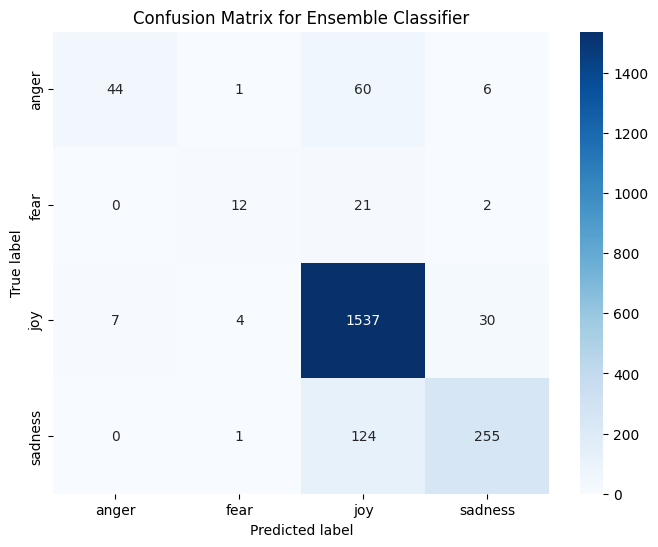

In [ ]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger',  'fear', 'joy', 'sadness'], yticklabels=['anger',  'fear', 'joy', 'sadness'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Ensemble Classifier')
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  44    1   60    6]
 [   0   12   21    2]
 [   7    4 1537   30]
 [   0    1  124  255]]


# Cross Validation

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score

clf = ensemble_clf
scores = cross_val_score(clf, X_new, y, cv=10)

print("Cross-validation scores:", scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross-validation scores: [0.8460076  0.84315589 0.82889734 0.8365019  0.83079848 0.85076046
 0.90485252 0.91817317 0.91627022 0.86108468]
0.86 accuracy with a standard deviation of 0.03


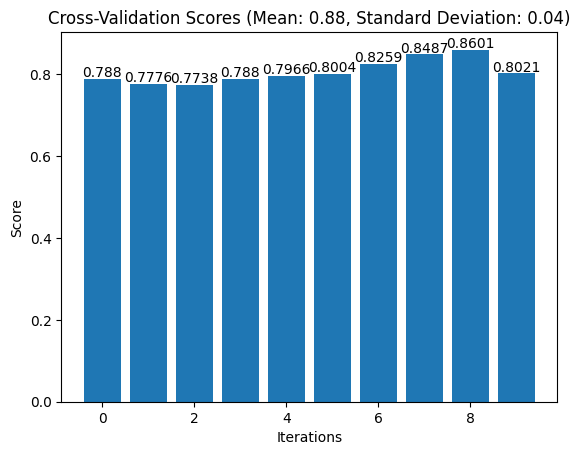

In [ ]:
# Cross-validation scores
scores = [0.78802281, 0.77756654, 0.77376426, 0.78802281, 0.79657795, 0.80038023, 0.82588011, 0.84871551, 0.86013321, 0.80209324]

# Calculate mean and standard deviation
mean = sum(scores) / len(scores)
std_dev = (sum((x - mean)**2 for x in scores) / len(scores))**0.5

# Create a bar graph of the cross-validation scores
plt.bar(range(0, 10), scores)
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('Cross-Validation Scores (Mean: 0.88, Standard Deviation: 0.04)')
for i, score in enumerate(scores):
    plt.text(i, score + 0.005, str(round(score, 4)), ha='center')
plt.show()